### MULTI CLASSIFICATION NEURAL NETWORKS

In the following, we are going to work with the famous MNIST database. It is a database of handwritten digits that is widely used to train image-processing models. In our case, the goal will be to train various Neural Networks models, and to test their performance when it comes to predicting the nature of diverse images (types of clothing here).

In [2]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

The train_data shape is (6000, 28, 28) which means that we have 6000 samples of 28 * 28 pixelized images.


The train_labels shape is (6000,) which means that every sample of a 28*28 image gives an input label (dim=1).


Let's visualize the first training input and the first training label.

In [3]:
# Show the first training example
print(f"Training sample:\"n{train_data[0]}\n")
print(f"Training label:\"n{train_labels[0]}\n")

Training sample:"n[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1 

Every row of the training data has a size of 28. (28*28) We understand that each of the training data input is an image which is numerically encoded as a matrix.

train_data[0].shape = (28, 28)

train_labels[0].shape = ()

We really take time to introduce these objects to make the following code cleare.

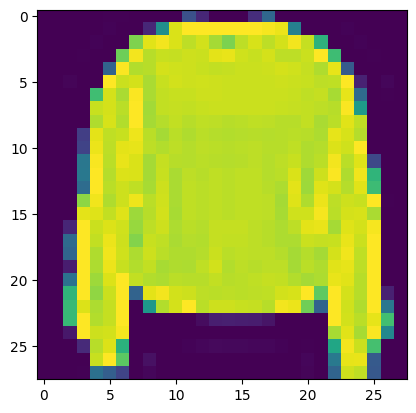

In [7]:
# Let's visualize what a single sample looks like (here it is the eigth training image)

import matplotlib.pyplot as plt

plt.imshow(train_data[7])

In [8]:
# Check out this sample labels

train_labels[7]

np.uint8(2)

It means that this training input has an associated output 2.

Text(0.5, 1.0, 'Sneaker')

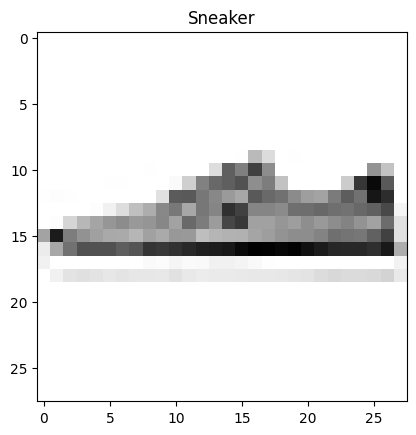

In [11]:
# Create a small list so we can index our training labels so they are readable.

class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker","Bag", "Ankle boot"]

# Plot an example image and its label 

index_of_choice = 14
plt.imshow(train_data[14], cmap=plt.cm.binary)
plt.title(class_names[train_labels[index_of_choice]])

It means that the 18th training input image is a sneaker. 
By introducing the class names, we now have a literal representation of our images rather than an index number like it was previously the case.


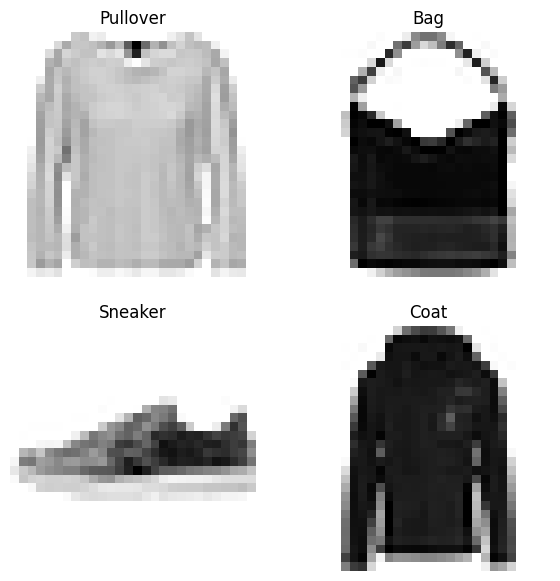

In [27]:
# Let's plot multiple random images of fashion MNIST

import random
plt.figure(figsize=(7,7))
for i in range(4):
    ax = plt.subplot(2, 2, i+1)
    rand_index = random.choice(range(len(train_data)))
    plt.imshow(train_data[rand_index], cmap=plt.cm.binary)
    plt.title(class_names[train_labels[rand_index]])
    plt.axis(False)

For our multi-class classification model, we can use a similar architecture to our binary classifiers (see on my NN-classification GitHub file in the BASICS repository). However, we're going to have to tweak a few things:

* Input shape = 28x28 (the shape of one image)
* Output shape : 10 (one per class of clothing)
* Loss function tf.keras.losses.CategoricalCrossentropy()
* Output layer activation = Softmax (not sigmoid)

Let's build our first multi-class classification Neural Network

In [16]:
# Model 1 

import tensorflow as tf

tf.random.set_seed(42)

model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation=tf.keras.activations.softmax)
])

model_1.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

non_norm_history = model_1.fit(train_data, train_labels, epochs=10, validation_data=(test_data, test_labels))

Epoch 1/10


ValueError: Argument `output` must have rank (ndim) `target.ndim - 1`. Received: target.shape=(32,), output.shape=(32, 28, 10)

There is an error of dimensions : our data needs to be flattened!

In [17]:
# Our data needs to be flattened (from 28*28 to (None, 784))

flatten_model = tf.keras.Sequential([tf.keras.layers.Flatten(input_shape=(28, 28))])
flatten_model.output_shape

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


(None, 784)

In [ ]:
# Model 1

tf.random.set_seed(42)

model_1 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation=tf.keras.activations.softmax)
])

model_1.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

non_norm_history = model_1.fit(train_data, 
                               train_labels, 
                               epochs=10, 
                               validation_data=(test_data, test_labels))

In [19]:
# Let's evaluate our model 1

model_1.evaluate(test_data, test_labels)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 362us/step - accuracy: 0.0978 - loss: 2.3027


[2.3026537895202637, 0.10000000149011612]

The model perform atrociously bad on this data. I still don't have a clue why but documentation on the net insists on the importance of normalization / scaling / numerisation of the data to perform well with Neural Networks.

In [28]:
# Normalizing the inputs

from tensorflow.keras.datasets import fashion_mnist

# Reload the original dataset (this will reset any modifications)
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

# Keep a copy of the original (unnormalized) data
train_data_original = train_data.copy()
test_data_original = test_data.copy()

# Now safely normalize the data (255 here is the max of the train and test data)
train_data_norm = train_data.astype("float32") / 255.0
test_data_norm = test_data.astype("float32") / 255.0

In [ ]:
# Implementation of model 2 on the original data

tf.random.set_seed(42)

model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

model_2.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

history_2 = model_2.fit(train_data,
                        train_labels,
                        epochs=10,
                        validation_data=(test_data, test_labels))

In [30]:
# Evaluation of model 2

model_2.evaluate(test_data, test_labels)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 472us/step - accuracy: 0.0978 - loss: 2.3027


[2.3026537895202637, 0.10000000149011612]

No improvements compared to model 1 because in fact, it is the same model. The main point to recall here is that for the model to actually learn efficiently, it has to learn on the normalized input data.

In [ ]:
# Model 3 trained on normalized data this time

tf.random.set_seed(42)

model_3 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

model_3.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

history_3 = model_3.fit(train_data_norm,
                        train_labels,
                        epochs=10,
                        validation_data=(test_data_norm, test_labels))

In [25]:
# Evaluation of model 3

model_3.evaluate(test_data_norm, test_labels)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 382us/step - accuracy: 0.8106 - loss: 0.5627


[0.5723305940628052, 0.8023999929428101]

Insightful observation : the same model performs way better on the normalized input data (training + testing). As can be seen, its accuracy is now around 0.81 and its loss decreased from 2.3027 to 0.5627. 

Text(0.5, 1.0, 'Normalized Data')

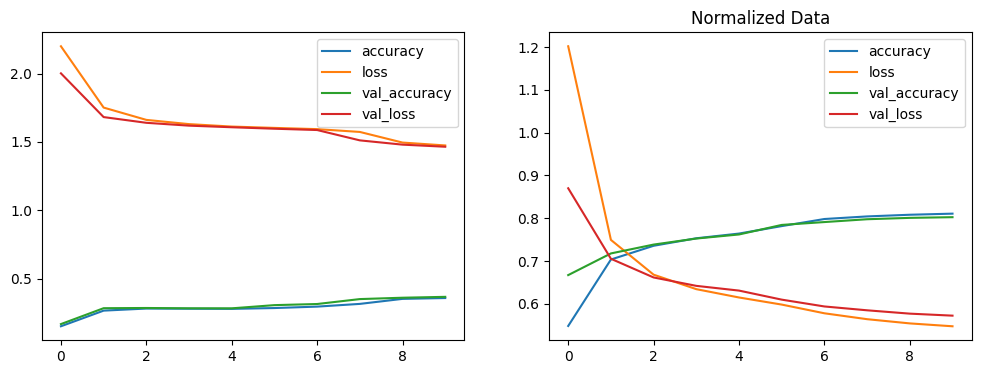

In [35]:
# Lets's plot our data loss curves (both normalized and non normalized)

import pandas as pd

fig, axes = plt.subplots(1, 2, figsize=(12, 4))
pd.DataFrame(history_2.history).plot(ax=axes[0])
plt.title("Non Normalized Data")
pd.DataFrame(history_3.history).plot(ax=axes[1])
plt.title("Normalized Data")

In the next model, we are going to try to determine the ideal learning rate that will allow the model to perform optimally.

In [ ]:
# Finding the ideal learning rate

tf.random.set_seed(42)

model_4 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

model_4.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Create the learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10**(epoch/20))

find_lr_history = model_4.fit(train_data_norm,
                              train_labels,
                              epochs=40,
                              validation_data=(test_data_norm, test_labels),
                              callbacks=[lr_scheduler])

Text(0.5, 1.0, 'Finding the ideal learning rate')

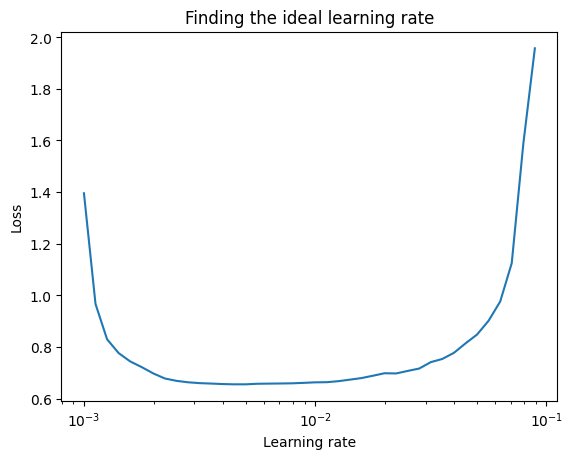

In [37]:
# Let's plot the learning rate decay curve

import numpy as np
import matplotlib.pyplot as plt

lrs = 1e-3 * (10**(tf.range(40)/20))
plt.semilogx(lrs, find_lr_history.history["loss"])
plt.xlabel("Learning rate")
plt.ylabel("Loss")
plt.title("Finding the ideal learning rate")

The ideal learning rate is the rate that produces a dramatic decrease in the loss function. Here, the best learning rate is easily identified : 0.001.
In the next model, we are going to work with this one.

In [ ]:
# Model 5

tf.random.set_seed(42)

model_5 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

model_5.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=["accuracy"])

history_5 = model_5.fit(train_data_norm,
                        train_labels,
                        epochs=20,
                        validation_data=(test_data_norm, test_labels))

Text(0.5, 1.0, 'Model 5 Loss Curves')

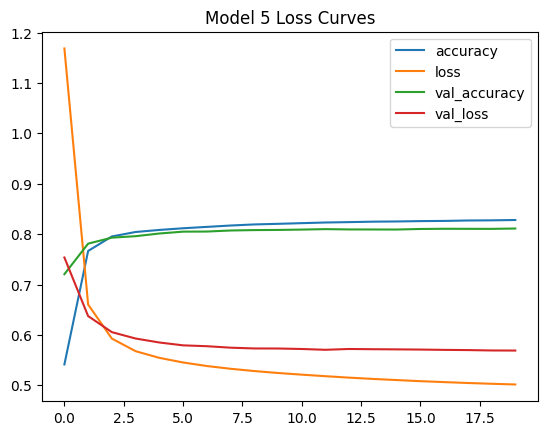

In [41]:
# Let's plot the loss curves of our model 5

pd.DataFrame(history_5.history).plot()
plt.title("Model 5 Loss Curves")

To evaluate our multi-class classification model, we could :
* Evaluate its performance using other classification metrics (such as a confusion matrix)
* Asses some of its predictions (through visualizations)
* Improve its results (by training it for longer or changing the architecture)
* Save and export it for use in an application

In the following, I will represent its confusion matrix of the model 5.

In [40]:
# Coding of the confusion matrix

import itertools
from sklearn.metrics import confusion_matrix

def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10, 10), text_size=15):

    # Create the confusion matrix
    cm = confusion_matrix(y_true, tf.round(y_pred))
    cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] 
    n_classes = cm.shape[0]

    # Let's make it prettier
    fig, ax = plt.subplots(figsize=figsize)

    # Create matrix plot
    cax = ax.matshow(cm, cmap=plt.cm.Blues)
    fig.colorbar(cax)

    # Set labels to be classes
    if classes:
        labels = classes
    else:
        labels = np.arange(cm.shape[0])

    # Label the axes
    ax.set(title="Confusion Matrix",
        xlabel="Predicted label",
        ylabel="True Label",
        xticks = np.arange(n_classes),
        yticks = np.arange(n_classes),
        xticklabels = labels,
        yticklabels = labels)

    # Set x-axis to bottom
    ax.xaxis.set_label_position("bottom")
    ax.xaxis.tick_bottom()

    # Adjust label size
    ax.yaxis.label.set_size(text_size)
    ax.xaxis.label.set_size(text_size)
    ax.title.set_size(text_size)

    # Set threshold for different colors
    threshold = (cm.max() + cm.min()) / 2

    # Plot the text on each cell
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
                horizontalalignment="center",
                color="white" if cm[i, j] > threshold else "black",
                size=text_size)    

The confusion matrix makes the link between the predicted and the true labels in a way that visually allows the reader to grasp how the model performs on the data. I am going to represent it in the following but before, let's predict the model_5 labels.

In [ ]:
y_preds = model_5.predict(test_data_norm)

In [43]:
# Let's represent its first 5 rows to see how the data is predicted.

y_preds[:5]

array([[2.6099890e-06, 1.0547715e-11, 2.0137275e-08, 5.7507460e-10,
        1.7566786e-16, 1.9429901e-01, 4.6406037e-10, 1.3715631e-01,
        4.5258415e-04, 6.6808939e-01],
       [8.1759143e-05, 4.6117740e-10, 9.4459820e-01, 1.0053605e-11,
        7.9520717e-03, 6.9365312e-11, 4.6410445e-02, 1.5093207e-36,
        9.5763366e-04, 3.4007655e-34],
       [3.7218753e-04, 9.9193144e-01, 2.3378078e-04, 4.7758915e-03,
        4.5654760e-04, 7.7090040e-04, 7.4071536e-04, 6.9559156e-04,
        1.2093362e-05, 1.0982669e-05],
       [4.1063718e-04, 9.8808014e-01, 1.9419978e-04, 8.6479718e-03,
        5.1539374e-04, 5.4837769e-04, 7.6326227e-04, 8.1339752e-04,
        1.0399102e-05, 1.6147278e-05],
       [8.6603835e-02, 4.5992895e-03, 1.1394900e-01, 1.2171990e-02,
        1.1378042e-01, 1.5047087e-06, 6.6670012e-01, 5.8167890e-17,
        2.1938793e-03, 1.5687017e-15]], dtype=float32)

In [44]:
# We want to convert the prediction probabilities into integers (each integer will represent the index of the class name associated with the predicted label)

y_preds = tf.argmax(y_preds, axis=1)

In [46]:
# Let's visualize the confusion matrix

from sklearn.metrics import confusion_matrix

confusion_matrix(y_true=test_labels,
                 y_pred=y_preds)

array([[687,   2,  20, 121,   5,   1, 153,   0,  11,   0],
       [  1, 943,   4,  36,  11,   0,   4,   0,   1,   0],
       [  9,   1, 715,  16, 157,   0,  99,   0,   3,   0],
       [ 25,  42,  11, 817,  47,   2,  53,   0,   3,   0],
       [  1,   1, 103,  31, 804,   0,  59,   0,   1,   0],
       [  0,   0,   0,   1,   0, 912,   0,  45,   6,  36],
       [127,   2, 151,  67, 170,   2, 473,   0,   8,   0],
       [  0,   0,   0,   0,   0,  41,   0, 931,   1,  27],
       [ 10,   1,  30,   6,   2,  18,  20,   4, 908,   1],
       [  0,   0,   1,   0,   0,  15,   0,  61,   2, 921]])

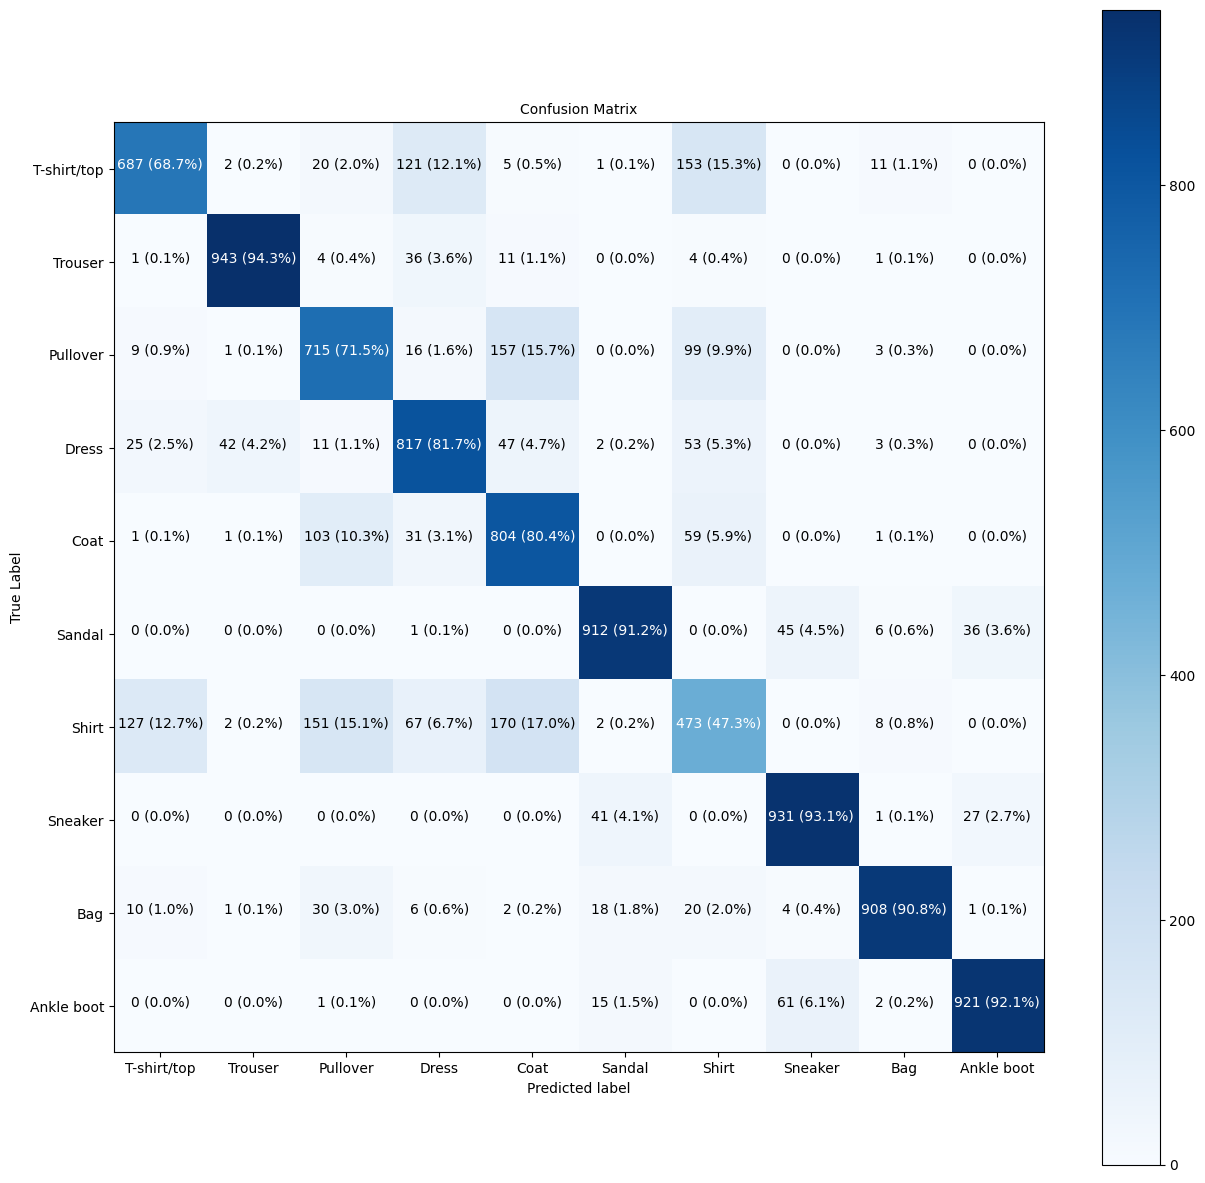

In [47]:
# Let's represent it in a more aesthetic way.

make_confusion_matrix(y_true=test_labels,
                      y_pred=y_preds,
                      classes=class_names,
                      figsize=(15, 15),
                      text_size=10)

Look at how the model is performing. Globally, it is doing a great job dissociating very different objects and is doing minor errors when it comes to similar types of clothes (tee-shirt and shirt for example).

To finish, we are going to write a function that will plot a random image, make a prediction on that said image and label the plot with the true label and the predicted label.

In [48]:
import random 

def plot_random_image(model, images, true_labels, classes):

    # Set up a random integer
    i = random.randint(0, len(images))

    # Create predictions and targets
    target_image = images[i]
    pred_probs = model.predict(target_image.reshape(1, 28, 28))
    pred_label = classes[pred_probs.argmax()]
    true_label = classes[true_labels[i]]

    # Plot the image
    plt.imshow(target_image, cmap=plt.cm.binary)

    # Change the color of the titles depending on if the prediction is right or wrong
    if pred_label == true_label:
        color = "green"
    else:
        color = "red"

    # Add xlabel information (prediction/true label)
    plt.xlabel("Pred:{} {:2.0f}% (True: {})".format(pred_label,
                                                    100*tf.reduce_max(pred_probs),
                                                    true_label), color=color) # set the color to green or red based on the trueness of prediction

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


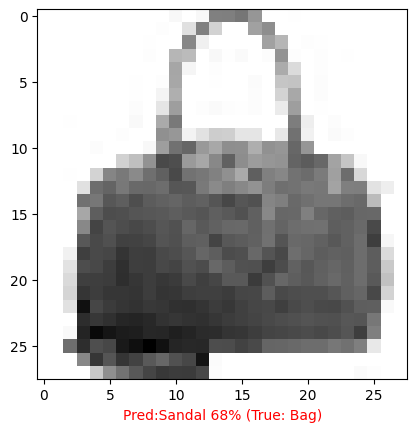

In [49]:
# Check out

plot_random_image(model=model_5,
                  images=test_data_norm,   # always make predictions with the same kind of data the model was trained on 
                  true_labels=test_labels,
                  classes=class_names)

For example, the model 5 made a false prediction! The image of a bag was randomly generated and it falsely predicted it to be a sandal. 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


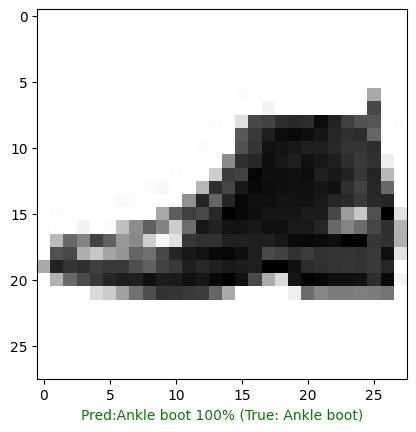

In [50]:
# Check out

plot_random_image(model=model_5,
                  images=test_data_norm,   # always make predictions with the same kind of data the model was trained on 
                  true_labels=test_labels,
                  classes=class_names)

Good prediction this time!

THANK YOU FOR FOLLOWING TILL THE END !